# Comparison between Urban and Rural areas development in India


## Introduction
**Using scraped census data from https://censusindia.gov.in/, the project is to analyse India's economic well-being development using Census data, the data available on India's website are 2001 Census and 2011 Census**

The dataset has 1908 entries with 156 features
memory usage: 2.3+ MB

#### **Goal**
**Compare both datasets features and plot on India's map**

In [ ]:
# Load libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# Load 2011 census data
df = pd.read_csv('india_census_housing-hlpca-full.csv', index_col=None)
df.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,Total Number of households,Total Number of Good,Total Number of Livable,Total Number of Dilapidated,Total Number of Residence households,Total Number of Residence Good,Total Number of Residence Livable,Total Number of Residence Dilapidated,Total Number of Residence cum other,Number of Residence cum Good,Residence_cum_Livable,Residence_cum_Dilapidated,Material_Roof_GTBW,Material_Roof_PP,Material_Roof_HMT,Material_Roof_MMT,Material_Roof_BB,Material_Roof_SS,Material_Roof_GMAS,Material_Roof_Concrete,Material_Roof_AOM,Material_Roof_GTB,Material_Roof_PP1,Material_Roof_MUB,Material_Roof_Wood,Material_Wall_SNPWM,Material_Wall_SPWM,Material_Wall_GIMAS,Material_Wall_Bb,Material_Wall_Concrete,Material_Wall_AOM,Material_Floor_Mud,Material_Floor_WB,Material_Floor_BB,Material_Floor_Stone,Material_Floor_Cement,Material_Floor_MF,Material_Floor_AOM,Dwelling_R_NER,Dwelling_R_OR,Dwelling_R_TR,Dwelling_R_TH_R,Dwelling_R_FR,Dwelling_R_FI_R,Dwelling_R_SRA,H_size_1,H_size_2,H_size_3,H_size_4,H_size_5,H_size_6_8,H_size_9,O_status_O,O_status_R,O_status_AO,Married_C_N,Married_C_1,Married_C_2,Married_C_3,Married_C_4,Married_C_5,DW_TFTS,DW_TFUS,DW_CW,DW_UW,DW_Handpump,DW_TB,DW_Spring,DW_RC,DW_TPL,DW_OS,Within_premises,Near_premises,Away,MSL_Electricty,MSL_Kerosene,MSL_SE,MSL_OO,MSL_AO,MSL_NL,Latrine_premise,Latrine_PSS,Latrine_ST,Latrine_OS,Pit_latrine_SVI,Pit_latrine_SOP,disposed_drain,Service_Latrine_NRH,Service_Latrine_NSA,H_latrine_premoses,Alternative_Source,Alternative_Source_Open,Households_Bathroom,Households_EWR,Households_No,Waste_water_CD,Waste_water_OD,Waste_water_ND,Cooking_FW,Cooking_CR,Cooking_CC,Cooking_CLC,Cooking_kerosene,Cooking_LPG_PNG,Cooking_Electricity,Cooking_Biogas,Cooking_AO,Cooking_NC,Total,Cooking_IH,Has_kitchen,DNHK,Cooking_OH,has_kitchen1,DNH_Kitchen,No_Cooking,TNHAB,assets_RT,assets_Tel,assets_CL_WI,assets_CLWI,assets_TM_LO,assets_TM_MO,assets_TM_Both,assets_Bicycle,assets_SMM,assets_CJV,Household_TV_LP,None_AS,Permanents,Semi_Permanent,Total_Temporary,Serviceable,Non_Serviceable,Unclassifiable,TC_VC,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0,7.1,1.1,7.8,0.1,0.3,0.2,0.1,1.1,87.1,0.6,2.6,0.5,0.4,11.1,31.1,7.3,2.2,0.3,44.7,1.4,1.0,55.9,6.6,0.3,3.6,33.5,0.1,0.1,2.7,21.3,27.0,25.3,12.8,3.5,7.3,0.8,3.8,5.9,10.0,13.9,40.3,25.2,98.2,0.4,1.4,8.4,75.6,13.6,2.0,0.3,0.1,11.8,33.5,5.0,10.7,2.8,1.7,1.8,24.8,1.6,6.2,19.0,36.0,45.0,76.5,11.1,3.0,1.2,4.9,3.2,48.9,4.6,4.4,10.2,2.8,6.3,2.2,17.8,0.7,51.1,8.1,43.0,57.9,3.4,38.7,3.6,25.5,70.9,82.9,2.6,0.9,0.0,0.7,11.7,0.1,0.9,0.2,0.1,100,97.4,93.7,3.7,2.5,0.9,1.5,0.1,49.1,54.4,23.1,0.6,4.0,1.2,49.4,1.2,2.7,1.6,2.5,0.4,26.1,52.9,37.7,6.0,5.6,0.4,3.4,0,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9,7.1,1.0,7.3,0.1,0.3,0.2,0.1,1.1,87.5,0.7,2.6,0.5,0.4,11.4,28.6,7.9,2.4,0.3,46.2,1.4,1.0,53.7,6.3,0.4,3.5,36.0,0.1,0.0,2.7,20.6,27.0,25.7,12.8,3.6,7.6,0.9,3.8,6.0,10.0,13.9,40.0,25.4,98.2,0.6,1.3,8.4,75.5,13.7,2.1,0.3,0.1,13.0,34.1,5.1,10.4,2.8,1.9,1.8,23.2,1.5,6.2,21.3,35.4,43.2,77.8,10.4,2.8,1.1,4.8,3.1,50.9,4.8,6.2,10.2,3.0,6.2,2.1,17.6,0.8,49.1,7.8,41.3,58.7,3.4,37.9,3.8,27.1,69.1,79.9,2.4,0.8,0.0,0.8,14.8,0.1,0.9,0.2,0.1,100,97.6,94.0,3.5,2.3,0.9,1.4,0.1,50.2,55.7,25.1,0.7,4.2,1.4,50.0,1.5,2.8,1.7,2.8,0.5,25.0,55.1,36.0,5.6,5.2,0.4,3.3,0,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7,7.3,0.2,2.9,0.2,0.4,0.0,0.1,0.8,91.3,2.0,2.2,0.4,0.2,14.0,4.8,13.2,4.6,0.2,60.6,0.8,1.2,32.3,3.3,1.1,2.7,60.5,0.1,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Columns: 156 entries, State Code to Residence_cum_Good
dtypes: float64(142), int64(9), object(5)
memory usage: 2.3+ MB


In [5]:
# Get unique states available
df['State Name'].unique()

array(['JAMMU & KASHMIR', 'HIMACHAL PRADESH', 'PUNJAB', 'CHANDIGARH',
       'UTTARAKHAND', 'HARYANA', 'NCT OF DELHI', 'RAJASTHAN',
       'UTTAR PRADESH', 'BIHAR', 'SIKKIM', 'ARUNACHAL PRADESH',
       'NAGALAND', 'MANIPUR', 'MIZORAM', 'TRIPURA', 'MEGHALAYA', 'ASSAM',
       'WEST BENGAL', 'JHARKHAND', 'ODISHA', 'CHHATTISGARH',
       'MADHYA PRADESH', 'GUJARAT', 'DAMAN & DIU', 'DADRA & NAGAR HAVELI',
       'MAHARASHTRA', 'ANDHRA PRADESH', 'KARNATAKA', 'GOA', 'LAKSHADWEEP',
       'KERALA', 'TAMIL NADU', 'PUDUCHERRY', 'ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [6]:
# Change states names to lower case, leave the first letter capital
df['State Name'] = df['State Name'].str.capitalize()
    
df['State Name'].unique()

array(['Jammu & kashmir', 'Himachal pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Nct of delhi', 'Rajasthan',
       'Uttar pradesh', 'Bihar', 'Sikkim', 'Arunachal pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West bengal', 'Jharkhand', 'Odisha', 'Chhattisgarh',
       'Madhya pradesh', 'Gujarat', 'Daman & diu', 'Dadra & nagar haveli',
       'Maharashtra', 'Andhra pradesh', 'Karnataka', 'Goa', 'Lakshadweep',
       'Kerala', 'Tamil nadu', 'Puducherry', 'Andaman & nicobar islands'],
      dtype=object)

In [7]:
# Hardcode two syllabus states
df['State Name'] = df['State Name'].replace({'Jammu & kashmir':'Jammu & Kashmir','Himachal pradesh':'Himachal Pradesh',
                                     'Nct of delhi':'NCT of Delhi','Uttar pradesh':'Uttar Pradesh','Arunachal pradesh':'Arunanchal Pradesh',
                                            'West bengal':'West Bengal','Madhya pradesh':'Madhya Pradesh','Daman & diu':'Daman & Diu',
                                            'Dadra & nagar haveli':'Dadara & Nagar Havelli','Andhra pradesh':'Andhra Pradesh',
                                            'Tamil nadu':'Tamil Nadu','Andaman & nicobar islands':'Andaman & Nicobar Island'})

df['State Name'].unique()

array(['Jammu & Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'NCT of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunanchal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Odisha', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman & Diu',
       'Dadara & Nagar Havelli', 'Maharashtra', 'Andhra Pradesh',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Puducherry', 'Andaman & Nicobar Island'], dtype=object)

In [8]:
# read districts shape files to plot India's map
import geopandas as gpd
from shapely.geometry import Point, Polygon


fp = "full_india_districts.shp"
map_df = gpd.read_file(fp)

In [9]:
# join the geopandas dataframe with rural/urban column on 2011 census data
map_df_2011 = map_df.join(df['Rural/Urban'])
map_df_2011.head(10)

,State,District,raster,geometry,Rural/Urban
0,Andaman and Nicobar,Nicobar Islands,nicobar_islands_andaman_and_nicobar_2011.tif,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",Rural
1,Andaman and Nicobar,North and Middle Andaman,north_and_middle_andaman_andaman_and_nicobar_2...,"MULTIPOLYGON (((92.93898 12.22386, 92.93916 12...",Total
2,Andaman and Nicobar,South Andaman,south_andaman_andaman_and_nicobar_2011.tif,"MULTIPOLYGON (((92.47972 10.52056, 92.47945 10...",Urban
3,Andhra Pradesh,Anantapur,anantapur_andhra_pradesh_2011.tif,"POLYGON ((77.71420 13.76079, 77.71314 13.75074...",Rural
4,Andhra Pradesh,Chittoor,chittoor_andhra_pradesh_2011.tif,"POLYGON ((78.46293 12.63537, 78.46190 12.63228...",Total
5,Andhra Pradesh,East Godavari,east_godavari_andhra_pradesh_2011.tif,"MULTIPOLYGON (((82.31735 16.57653, 82.31735 16...",Urban
6,Andhra Pradesh,Guntur,guntur_andhra_pradesh_2011.tif,"MULTIPOLYGON (((80.78291 15.83764, 80.78291 15...",Rural
7,Andhra Pradesh,Krishna,krishna_andhra_pradesh_2011.tif,"MULTIPOLYGON (((81.02792 15.76569, 81.02792 15...",Total
8,Andhra Pradesh,Kurnool,kurnool_andhra_pradesh_2011.tif,"POLYGON ((77.15276 15.13162, 77.13536 15.13601...",Urban
9,Andhra Pradesh,Nellore,nellore_andhra_pradesh_2011.tif,"MULTIPOLYGON (((80.09708 13.64153, 80.09708 13...",Rural


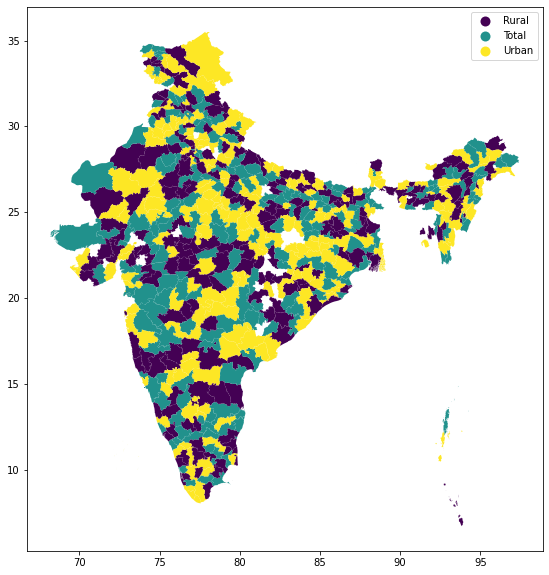

In [10]:
map_df_2011.plot(column='Rural/Urban', figsize=[10,10], cmap='viridis',legend=True);


In [22]:
# Load 2001 Census data
df1 = pd.read_csv('all_2001_census_available.csv', index_col=None)
df1.head()

,Unnamed: 0,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,Percentage...SC.to.total,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Scheduled.Tribe.population,Percentage.to.total.population..ST.,Persons..literate,Males..Literate,Females..Literate,Persons..literacy.rate,Males..Literatacy.Rate,Females..Literacy.Rate,Total.Educated,Data.without.level,Below.Primary,Primary,Middle,Matric.Higher.Secondary.Diploma,Graduate.and.Above,X0...4.years,X5...14.years,X15...59.years,X60.years.and.above..Incl..A.N.S..,Total.workers,Main.workers,Marginal.workers,Non.workers,SC.1.Name,SC.1.Population,SC.2.Name,SC.2.Population,SC.3.Name,SC.3.Population,Religeon.1.Name,Religeon.1.Population,Religeon.2.Name,Religeon.2.Population,Religeon.3.Name,Religeon.3.Population,ST.1.Name,ST.1.Population,ST.2.Name,ST.2.Population,ST.3.Name,ST.3.Population,Imp.Town.1.Name,Imp.Town.1.Population,Imp.Town.2.Name,Imp.Town.2.Population,Imp.Town.3.Name,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Electricity..domestic.,Electricity..Agriculture.,Primary.school,Middle.schools,Secondary.Sr.Secondary.schools,College,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,1,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,-,-,70167.0,4.0,844.0,959.0,2904,0.92,226600,131223,95377,82.49,87.36,76.62,226600.0,1623.0,48339.0,62233.0,49731.0,50748.0,13909.0,27505.0,64496.0,204928.0,17155.0,116631,100683,15948,197453,No Scheduled Castes in this area,NaN,NaN,NaN,NaN,NaN,1.Hindus,235862,2.Christians,49033,3.Muslims,27134,1.Nicobarese,2486,2.Jarawas,240,3.Onges,96,1.Port Blair (M Cl),99984.0,2.Garacharma (CT),9427.0,3.Bambooflat (CT),6787.0,331.0,331.0,293.0,233.0,148,16,185.0,83,71,1,102,16,78,161.0,187,201,243,28.7,39.1,32.0
1,2,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,-,-,-,8075.0,5.0,857.0,936.0,26565,63.15,26535,15608,10927,72.35,78.55,65.01,26535.0,346.0,5062.0,8544.0,6439.0,5150.0,994.0,3736.0,8307.0,27535.0,2490.0,19623,12924,6699,22445,No Scheduled Castes in this area,NaN,NaN,NaN,NaN,NaN,1.Christians,28145,2.Hindus,10727,3.Muslims,2131,1.Nicobarese,26167,2.Shom Pens,398,3.All Scheduled Tribes,26565,No Urban Area,NaN,NaN,NaN,NaN,NaN,170.0,169.0,163.0,96.0,93,-,53.0,25,22,-,38,4,31,36.0,49,51,111,28.0,33.3,38.7
2,3,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,NaN,NaN,NaN,524649.0,5.0,989.0,962.0,416511,16.74,1112189,688072,424117,52.68,64.98,40.30,1112189.0,46680.0,347433.0,305503.0,114789.0,254169.0,43564.0,243389.0,659331.0,1417252.0,168031.0,1123248,912287,210961,1364755,NaN,154470.0,NaN,147883.0,NaN,73083.0,NaN,2207843,NaN,236844,NaN,24392,1.Gond etc.,200944,2.Sugalis etc.,103303,3.Kolam etc.,45437,NaN,109529.0,NaN,75254.0,(M),70381.0,1586.0,1585.0,1580.0,1585.0,-,-,1521.0,429,196,NaN,976,61,432,558.0,814,979,544,53.0,39.9,7.0
3,4,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,NaN,NaN,NaN,484588.0,5.0,1017.0,958.0,165735,7.07,1044788,642996,401792,52.02,64.91,39.48,1044788.0,43604.0,288554.0,304556.0,106517.0,249549.0,51926.0,216402.0,567129.0,1382370.0,179784.0,1159606,971911,187695,1186079,1.Madiga,168229.0,2.Mala,157187.0,3.Gosangi,9760.0,1.Hindus,1983275,2.Muslims,338824,3.Christians,16204,1.Sugalis etc.,142355,2.Gond etc.,13971,3.Yerukulas,5409,1.Nizamabad (M),288722.0,2.Bodhan (M),71520.0,3.Kamareddy (M),64496.0,854.0,854.0,854.0,854.0,-,-,839.0,417,256,NaN,614,50,330,602.0,746,760,82,52.8,37.6,9.6
4,5,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,NaN,NaN,NaN,813797.0,4.0,998.0,961.0,90636,2.6,1661089,1013328

Get insights on data types

In [23]:
df1[['Rural','Urban']].describe()

,Rural,Urban
count,590,68
unique,582,60
top,-,-
freq,9,9


In [24]:
df1['Growth..1991...2001.'] = pd.to_numeric(df1['Growth..1991...2001.'], errors='coerce')

In [27]:
df1['Rural'] = pd.to_numeric(df1['Rural'], errors='coerce')
df1['Urban'] = pd.to_numeric(df1['Urban'], errors='coerce')
df1[['Rural','Urban']].describe()

,Rural,Urban
count,5.810000e+02,5.900000e+01
mean,1.269540e+06,3.540150e+05
std,9.268042e+05,7.545550e+05
min,1.822300e+04,6.693000e+03
25%,6.248980e+05,2.632000e+04
50%,1.121338e+06,9.119500e+04
75%,1.738127e+06,3.444565e+05
max,8.626883e+06,4.663533e+06


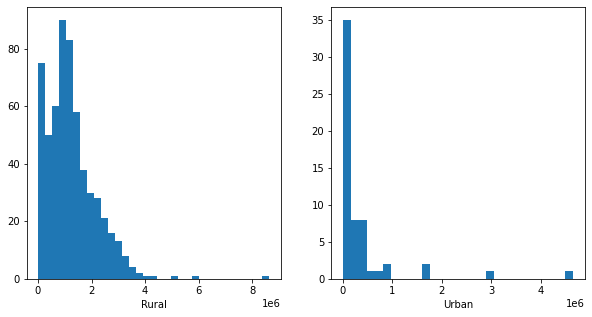

In [43]:
plt.figure(figsize=[10,5]);
plt.subplot(1,2,1)
sns.distplot(df1['Rural'], kde=False, hist_kws={'alpha':1});
plt.subplot(1,2,2)
sns.distplot(df1['Urban'], kde=False, hist_kws={'alpha':1});

In [ ]:
sb.countplot(df1['Rural'])

In [16]:
df1.fillna(0, inplace=True)

In [17]:
df1.columns

Index(['Unnamed: 0', 'State', 'District', 'Persons', 'Males', 'Females',
       'Growth..1991...2001.', 'Rural', 'Urban', 'Scheduled.Caste.population',
       'Percentage...SC.to.total', 'Number.of.households',
       'Household.size..per.household.', 'Sex.ratio..females.per.1000.males.',
       'Sex.ratio..0.6.years.', 'Scheduled.Tribe.population',
       'Percentage.to.total.population..ST.', 'Persons..literate',
       'Males..Literate', 'Females..Literate', 'Persons..literacy.rate',
       'Males..Literatacy.Rate', 'Females..Literacy.Rate', 'Total.Educated',
       'Data.without.level', 'Below.Primary', 'Primary', 'Middle',
       'Matric.Higher.Secondary.Diploma', 'Graduate.and.Above', 'X0...4.years',
       'X5...14.years', 'X15...59.years', 'X60.years.and.above..Incl..A.N.S..',
       'Total.workers', 'Main.workers', 'Marginal.workers', 'Non.workers',
       'SC.1.Name', 'SC.1.Population', 'SC.2.Name', 'SC.2.Population',
       'SC.3.Name', 'SC.3.Population', 'Religeon.1.Name',


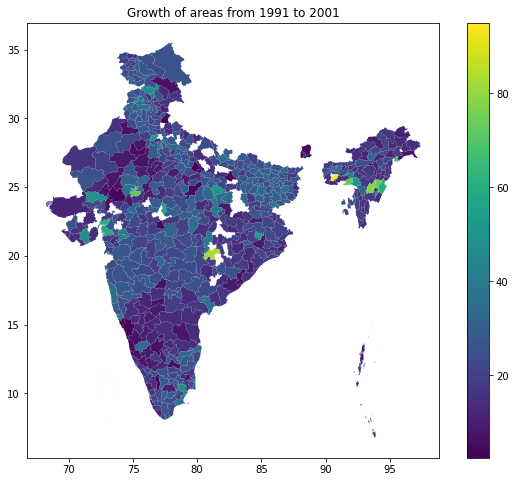

In [45]:
# Get ground truth rural or urban on districts wise by joining shape file with growth columns
map_df_2001 = map_df.join(df1['Growth..1991...2001.']) 
map_df_2001.plot(column='Growth..1991...2001.', figsize=[10,8], cmap='viridis', legend=True);
plt.title('Growth of areas from 1991 to 2001');

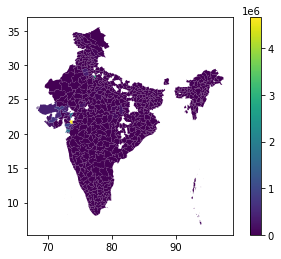

In [19]:
# Urban areas in 2001, scale towards yellow color
map_df_2001 = map_df.join(df1['Urban']) 
map_df_2001.plot(column='Urban', cmap='viridis', legend=True);

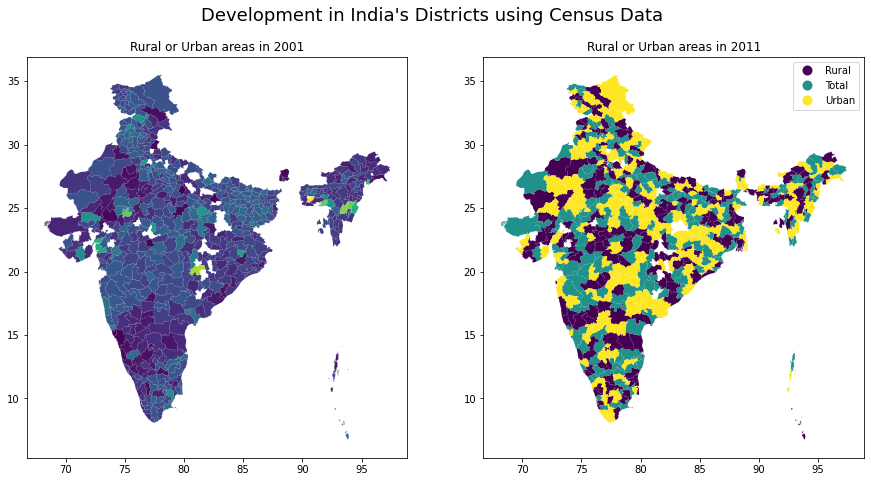

In [46]:
# Plot comparison between rural and urban districts in 2001 and 2011
fig, axes = plt.subplots(ncols=2, figsize=[15,10])
ax1 = map_df_2001.plot(column='Growth..1991...2001.', cmap='viridis',
                 legend=False, ax= axes[0]);
ax1.set_title('Rural or Urban areas in 2001');
# plt.subplot(1,2,2);
ax2 = map_df_2011.plot(column='Rural/Urban', cmap='viridis',legend=True, ax=axes[1]);
ax2.set_title('Rural or Urban areas in 2011');
#ax2 = map_df_201.plot(column='Rural', cmap='viridis', legend=False);
fig.suptitle("Development in India's Districts using Census Data", fontsize=18, y=0.85);

In [ ]:
# shape file oh India's districts
import geopandas as gpd
from shapely.geometry import Point, Polygon


fp = "full_india_districts.shp"
map_df = gpd.read_file(fp)

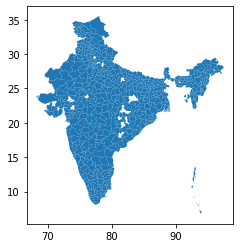

In [47]:
map_df.plot();